In [1]:
# importing packages
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

### preprocessing
* replace '#' with space
* replace '_' with space
* remove all characters except arabic ones
* removing punctuation, numbers, special characters
* removing diacritics
* normalize arabic characters
* remove multiple characters, remove multiple spaces

- **i will not make stemming or limmatization as this will destroy the main informaion needed for this task**
- **also removing stop words may remove valuable information**
- there aren't upper case characters to lower, or urls to remove

In [2]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                             """, re.VERBOSE)

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text

def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)   # i keep this because this one contains useful feature as specially iraq uses this character
    return text

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

def clean_text(text):
    t = re.sub(r'#', ' ', text) # replace '#' with space
    t = re.sub(r'_', ' ', t)    # replace '_' with space
    t = re.sub(r'[^\u0600-\u06FF]', ' ', t) # remove all characters except arabic ones
    t = remove_diacritics(t) 
    t = remove_punctuations(t) # remove the remained punctuations, actually the remains are only """ ?,; """
    t = normalize_arabic(t)    # replace speacial arabic characters with some how general ones
    t = re.sub(r' +', ' ', t)  # remove multiple spaces, also can done with re.sub(r'/\s\s+/g', ' ', text)
    t = remove_repeating_char(t)
    return t
    

In [3]:
raw_df = pd.read_csv("../csv_files/raw_txt_df.csv", index_col="id")
raw_df.head()

,raw_txt
id,
1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
1175450108898565888,@KanaanRema مبين من كلامه خليجي
1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [4]:
raw_df["txt"] = [clean_text(text) for text in raw_df["raw_txt"]]
raw_df.head()

,raw_txt,txt
id,,
1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,لكن بالنهايه ينتفض يغير
1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,يعني هذا محسوب علي البشر حيونه وحشيه وتطلبون ...
1175450108898565888,@KanaanRema مبين من كلامه خليجي,مبين من كلامه خليجي
1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,يسلملي مرورك وروحك الحلوه
1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,وين هل الغيبه اخ محمد


In [5]:
label_df = pd.read_csv("../csv_files/dialect_dataset.csv", index_col="id")
df = pd.merge(raw_df["txt"], label_df, left_index=True, right_index=True) # === pd.concat([txt_df, label_df], axis=1)
df.head()

,txt,dialect
id,,
1175358310087892992,لكن بالنهايه ينتفض يغير,IQ
1175416117793349632,يعني هذا محسوب علي البشر حيونه وحشيه وتطلبون ...,IQ
1175450108898565888,مبين من كلامه خليجي,IQ
1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458197 entries, 1175358310087892992 to 1022409931029458944
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   txt      458197 non-null  object
 1   dialect  458197 non-null  object
dtypes: object(2)
memory usage: 26.6+ MB


In [7]:
df.describe()

,txt,dialect
count,458197,458197
unique,457505,18
top,,EG
freq,146,57636


In [8]:
df["dialect"].isna().sum()

0

In [9]:
df["txt"].isna().sum()

0

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64


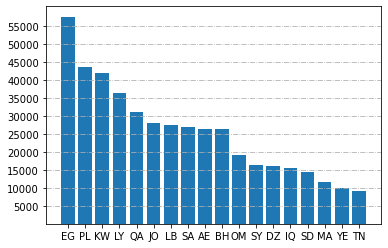

In [10]:
val_count = df["dialect"].value_counts()
plt.bar(x=val_count.index, height=val_count)
plt.yticks(list(range(5000, 60000, 5000)))
plt.grid(axis="y", ls='-.') 
print(val_count)

The brevious chart shows that the data is imbalanced,as example number of "EG" category instances is higher that "TN" or "YE" ones,  we will fix this issue.

In [11]:
# drop null rows
df.dropna(inplace=True)
df.shape
# no null values was existed 

(458197, 2)

In [12]:
# drop identical rows
df.drop_duplicates(inplace=True)
df.shape
# (458197 - 457914) = 283 rows was deleted by this cell

(457914, 2)

In [13]:
df.nunique()
# there are duplicated values in the txt-column

txt        457505
dialect        18
dtype: int64

- **droping the rows of the txt-column dublicated values i.e (duplicated txt-column values that have different dialects)**

In [14]:
# honestly i'm not very sure if this step is correct
df.drop_duplicates(subset='txt', inplace=True)
df.shape
# (457914 - 457505) = 409 rows is removed by this cell

(457505, 2)

- **i will remove very short naive txt that can't reliably used to determine the dialect, i tried string lengths(7-19) to find suitable short string length before i satisfied with '9'**

In [15]:
df[df.txt.str.len()<9]

,txt,dialect
id,,
471056063672750080,,IQ
554726548751011840,كون ني,IQ
390471289649258496,و,IQ
960352111656689664,ء طرف,LY
728385183779540992,ت ليبيا,LY
...,...,...
817438639407976448,تندم ز,AE
659466818218647552,ي,AE
352646650252103680,ك زين,AE


In [16]:
df.drop(index=df[df.txt.str.len()<9].index, inplace=True)
df.shape
# 91 rows removed by this cell

(457414, 2)

In [17]:
# tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#######################################################################

# df["txt_tok"] = [line.split() for line in df.txt]
df["txt_tok"] = [word_tokenize(line) for line in df.txt]
df.txt_tok.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huzyfa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


id
1175358310087892992                         [لكن, بالنهايه, ينتفض, يغير]
1175416117793349632    [يعني, هذا, محسوب, علي, البشر, حيونه, وحشيه, و...
1175450108898565888                             [مبين, من, كلامه, خليجي]
1175471073770573824                       [يسلملي, مرورك, وروحك, الحلوه]
1175496913145217024                          [وين, هل, الغيبه, اخ, محمد]
Name: txt_tok, dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457414 entries, 1175358310087892992 to 1022409931029458944
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   txt      457414 non-null  object
 1   dialect  457414 non-null  object
 2   txt_tok  457414 non-null  object
dtypes: object(3)
memory usage: 14.0+ MB


In [19]:
df.to_csv("../csv_files/preprocessed_df.csv")

In [20]:
pd.read_csv("../csv_files/preprocessed_df.csv", index_col="id").head()

,txt,dialect,txt_tok
id,,,
1175358310087892992,لكن بالنهايه ينتفض يغير,IQ,"['لكن', 'بالنهايه', 'ينتفض', 'يغير']"
1175416117793349632,يعني هذا محسوب علي البشر حيونه وحشيه وتطلبون ...,IQ,"['يعني', 'هذا', 'محسوب', 'علي', 'البشر', 'حيون..."
1175450108898565888,مبين من كلامه خليجي,IQ,"['مبين', 'من', 'كلامه', 'خليجي']"
1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ,"['يسلملي', 'مرورك', 'وروحك', 'الحلوه']"
1175496913145217024,وين هل الغيبه اخ محمد,IQ,"['وين', 'هل', 'الغيبه', 'اخ', 'محمد']"
